In [1]:
import pandas as pd
import os
import pandas as pd
import numpy as np
import os
import re
from pathlib import Path
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

def describir_dataset(archivo):
    with open("estadisticas.txt", "w", encoding='utf-8') as f:  
        f.write("Análisis de todos los datasets\n")
        f.write("="*60 + "\n")
        
        for archivo in os.listdir("departamentos_csv"):
            if archivo.endswith(".csv"):
                print(f"\n--- Analizando el archivo: {archivo} ---")
                
                try:
                    df = pd.read_csv(f"departamentos_csv/{archivo}")
                    
                    f.write(f"\n--- Analizando el archivo: {archivo} ---\n")
                    f.write(f"\nESTADÍSTICAS DETALLADAS:\n")
                    f.write(f" Filas iniciales: {df.shape[0]}\n")
                    f.write(f" Variables iniciales: {df.shape[1]}\n")
                    
                    for col in df.columns:
                        f.write(f"\n Variable {col}:\n")
                        f.write(f" Tipo: {df[col].dtype}\n")
                        f.write(f" Valores únicos: {df[col].nunique()}\n")
                        f.write(f" Valores nulos: {df[col].isnull().sum()}\n")
                        f.write(f" Valores duplicados: {df[col].duplicated().sum()}\n")
                        
                        if df[col].dtype in ['int64', 'float64']:
                            f.write(f" Min: {df[col].min()}\n")
                            f.write(f" Max: {df[col].max()}\n")
                            f.write(f" Media: {df[col].mean():.2f}\n")
                        else:
                            valor_comun = df[col].mode().iloc[0] if not df[col].mode().empty else 'N/A'
                            f.write(f" Valor más común: {valor_comun}\n")
                    
                    f.write("\n" + "="*50 + "\n")
                    
                except Exception as e:
                    f.write(f"Error con {archivo}: {e}\n")
                    print(f"Error con {archivo}: {e}")

        
        
for archivo in os.listdir("departamentos_csv"):
    if archivo.endswith(".csv"):
        print(f"\n--- Analizando el archivo: {archivo} ---")
        respuesta = describir_dataset(archivo)

C:\Users\brand\AppData\Local\Temp\ipykernel_8980\1978704141.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd



--- Analizando el archivo: alta_verapaz.csv ---

--- Analizando el archivo: alta_verapaz.csv ---

--- Analizando el archivo: baja_verapaz.csv ---

--- Analizando el archivo: chimaltenango.csv ---

--- Analizando el archivo: chiquimula.csv ---

--- Analizando el archivo: ciudad_capital.csv ---

--- Analizando el archivo: el_progreso.csv ---

--- Analizando el archivo: escuintla.csv ---

--- Analizando el archivo: guatemala.csv ---

--- Analizando el archivo: huehuetenango.csv ---

--- Analizando el archivo: izabal.csv ---

--- Analizando el archivo: jalapa.csv ---

--- Analizando el archivo: jutiapa.csv ---

--- Analizando el archivo: peten.csv ---

--- Analizando el archivo: quetzaltenango.csv ---

--- Analizando el archivo: quiche.csv ---

--- Analizando el archivo: retalhuleu.csv ---

--- Analizando el archivo: sacatepequez.csv ---

--- Analizando el archivo: santa_rosa.csv ---

--- Analizando el archivo: san_marcos.csv ---

--- Analizando el archivo: solola.csv ---

--- Analizando 

In [2]:
import pandas as pd
import os

ruta = "departamentos_csv"
archivos_csv = [os.path.join(ruta, f) for f in os.listdir(ruta) if f.endswith(".csv")]

df_list = [pd.read_csv(f, encoding='utf-8') for f in archivos_csv]
df_completo = pd.concat(df_list, ignore_index=True)

print("Filas totales:", df_completo.shape[0])
print("Columnas totales:", df_completo.shape[1])


Filas totales: 6584
Columnas totales: 18


### Estadísticas generales del conjunto de datos

- Número total de registros (filas): 18,586  
- Número total de variables (columnas): 17  


### Variables presentes en el dataset

- Unnamed: 0
- ESTABLECIMIENTO  
- DIRECCION  
- TELEFONO 
- MUNICIPIO  
- AREA  
- SUPERVISOR  
- DIRECTOR  
- (y otras según los archivos fuente de cada departamento)


### Observaciones relevantes

- Duplicados:  
  Se detectan registros repetidos principalmente en columnas como ESTABLECIMIENTO y SUPERVISOR, muchas veces por diferencias mínimas de escritura.

- Valores nulos:  
  Variables como TELEFONO y DIRECCION contienen valores vacíos o faltantes, lo cual puede afectar la calidad del análisis.

- Frecuencia de valores únicos (cardinalidad):
  - AREA tiene pocos valores únicos ("urbana", "rural"), lo que facilita su codificación.
  - Variables como SUPERVISOR, DIRECTOR y ESTABLECIMIENTO tienen alta cardinalidad.

- Errores comunes detectados:
  - En ESTABLECIMIENTO y MUNICIPIO: errores ortográficos (acentos, mayúsculas, abreviaciones).
  - En TELEFONO: formatos no válidos o campos vacíos (guiones, paréntesis, longitudes distintas).



### Descripción del conjunto de datos

El conjunto de datos fue construido a partir de múltiples archivos .csv, cada uno representando información educativa de un departamento del país.

Tras combinarlos, se obtuvo un dataset con 18,586 registros (filas) y 17 variables (columnas) en su forma cruda, sin limpieza. Estas variables incluyen información como nombre del establecimiento, municipio, supervisor, dirección, teléfono, entre otros.


-----------------------------------
### Liste las variables que más operaciones de limpieza necesitarán. 
----------------------------------

Tras el analizis de los arhcivos .csv de los diferentes departamentos, se observo que los datos presentan las siguientes características comunes:
 - Variables categóricas con escritura inconsistente, como el uso mixto de mayúsculas y minúsculas, errores ortográficos y abreviaturas no estandarizadas.

 - Columnas sin nombre útil (ej. Unnamed: 1), probablemente generadas por exportaciones de Excel mal estructuradas.

 - Duplicidad en valores clave, especialmente en nombres de establecimientos y supervisores, donde pequeños cambios en ortografía generan múltiples registros que deberían ser uno solo.

 - Formatos no estandarizados en campos como TELEFONO y DIRECCION, lo cual complica validaciones automáticas.

 - Presencia de caracteres especiales innecesarios en varias columnas.

 - Valores nulos o incompletos en campos relevantes, lo cual puede afectar análisis estadísticos posteriores.

### Variables que más operaciones de limpieza necesitarán

A partir del análisis de los archivos CSV, se identificaron las siguientes variables como las más problemáticas y que requerirán mayor cantidad de operaciones de limpieza:

- ESTABLECIMIENTO
  - Escritura inconsistente (mayúsculas, espacios, tildes).
  - Errores ortográficos.
  - Duplicados con diferencias mínimas de formato.

- DIRECCION  
  - Uso combinado de mayúsculas y minúsculas.
  - Caracteres especiales o símbolos innecesarios.
  - Información incompleta o ambigua.

- TELEFONO  
  - Formato inconsistente: uso de guiones, paréntesis, espacios o prefijos.
  - Algunos registros pueden tener valores inválidos o estar vacíos.

- SUPERVISOR / DIRECTOR 
  - Diferentes formas de escribir un mismo nombre.
  - Abreviaciones o errores ortográficos frecuentes.
  - Escritura inconsistente con y sin tildes.

- MUNICIPIO
  - Variaciones de nombre por errores ortográficos o uso de acentos.
  - Duplicidad con nombres levemente distintos.



### Estrategia para limpiar el conjunto de datos

- Para la variable "ESTABLECIMIENTO" se planea : 
1. Convertir todos los valores a mayúsculas o minúsculas para homogeneizar.

2. Hacer trimming al eliminar espacios innecesarios.

3. Usar herramientas de búsqueda aproximada, como fuzzy matching, para detectar nombres similares con diferencias mínimas.

4. Corregir errores ortográficos comunes en nombres repetidos.

5. Eliminar duplicados. 
----------------------------------

- Para la variable "DIRECCION" se planea:
1. Unificar el uso de mayúsculas y minúsculas para todo el campo.

2. Eliminar símbolos y caracteres especiales innecesarios. 

3. Corregir abreviaturas comunes como "AV" a "AVENIDA", para facilitar el análisis.

4. Completar valores ambiguos. 

5. Verificar patrones para dividir la dirección en partes.
----------------------------------

- Para la variable "TELEFONO" se planea: 
1. Eliminar espacios, guiones, paréntesis y otros caracteres no numéricos.

2. Validar longitud de 8 dígitos para detectar números inválidos.

3. Tratar valores nulos para evitar pérdida de datos.
----------------------------------

- Para las variables "SUPERVISOR / DIRECTOR" se planea:
1. Convertir nombres a mayúsculas o minúsculas.

2. Eliminar espacios innecesarios y normalizar caracteres acentuados.

3. Crear un catálogo de nombres estandarizados.
----------------------------------

- Para la variable "MUNICIPIO" se planea:  
1. Uniformar el uso de mayúsculas y minusculas y eliminar tildes.

2. Corregir errores ortográficos evidentes y mapear variaciones.

3. Reemplazar valores no válidos por un marcador, si no se puede corregir.


In [3]:
def normalizar_texto(text):
    if pd.isna(text):
        return ""
    text = str(text).upper().strip()
    text = re.sub(r'[^\w\s\-\.\,\(\)]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

def limpiar_numero_telefono(phone):
    if pd.isna(phone):
        return None
    phone_str = re.sub(r'\D', '', str(phone))
    
    if len(phone_str) == 8:
        return phone_str
    elif len(phone_str) == 11 and phone_str.startswith('502'):
        return phone_str[3:]
    elif len(phone_str) > 8:
        matches = re.findall(r'\d{8}', phone_str)
        if matches:
            return matches[0]
    return None

def limpiar_dir(address):
    if pd.isna(address):
        return ""
    address = normalizar_texto(address)
    
    abbreviations = {
        r'\bAV\b': 'AVENIDA', r'\bAVE\b': 'AVENIDA', r'\bCAL\b': 'CALLE',
        r'\bCDA\b': 'CALZADA', r'\bCOL\b': 'COLONIA', r'\bBR\b': 'BARRIO',
        r'\bKM\b': 'KILOMETRO', r'\bZ\b': 'ZONA', r'\bNO\b': 'NUMERO'
    }
    
    for abbrev, full_form in abbreviations.items():
        address = re.sub(abbrev, full_form, address)
    return address.strip()

def limpiar_nombres(name):
    if pd.isna(name):
        return ""
    name = normalizar_texto(name)
    
    titles = [r'\bLIC\b', r'\bLICA\b', r'\bING\b', r'\bDR\b', r'\bDRA\b', 
             r'\bPROF\b', r'\bPROFA\b', r'\bMSC\b']
    
    for title in titles:
        name = re.sub(title, '', name)
    return re.sub(r'\s+', ' ', name).strip()

def encontrar_similar(establishments_series, threshold=85):
    unique_establishments = establishments_series.unique()
    mapping = {}
    similar_groups = []
    
    for i, est1 in enumerate(unique_establishments):
        if est1 in mapping:
            continue
            
        similar_group = [est1]
        
        for j, est2 in enumerate(unique_establishments[i+1:], i+1):
            if est2 in mapping:
                continue
            similarity = fuzz.ratio(est1, est2)
            if similarity >= threshold:
                similar_group.append(est2)
        
        if len(similar_group) > 1:
            counts = establishments_series.value_counts()
            standard = max(similar_group, key=lambda x: counts.get(x, 0))
            
            for similar in similar_group:
                mapping[similar] = standard
            similar_groups.append({
                'standard': standard,
                'variants': similar_group,
                'count': len(similar_group)
            })
    
    return mapping, similar_groups


In [4]:
from pathlib import Path
output_folder = Path("datasets_limpios")
output_folder.mkdir(exist_ok=True)

input_folder = Path("departamentos_csv")
csv_files = list(input_folder.glob("*.csv"))

print(f"Archivos encontrados: {len(csv_files)}")
for file in csv_files:
    print(f"   • {file.name}")

all_dataframes = []
for file_path in csv_files:
    df = pd.read_csv(file_path, encoding='utf-8')
    df['ARCHIVO_ORIGEN'] = file_path.stem
    all_dataframes.append(df)

df_original = pd.concat(all_dataframes, ignore_index=True)
print(f"\nDataset original combinado:")
print(f"   Total registros: {len(df_original):,}")
print(f"   Total columnas: {len(df_original.columns)}")
print(f"   Departamentos: {df_original['DEPARTAMENTO'].nunique()}")

Archivos encontrados: 23
   • alta_verapaz.csv
   • baja_verapaz.csv
   • chimaltenango.csv
   • chiquimula.csv
   • ciudad_capital.csv
   • el_progreso.csv
   • escuintla.csv
   • guatemala.csv
   • huehuetenango.csv
   • izabal.csv
   • jalapa.csv
   • jutiapa.csv
   • peten.csv
   • quetzaltenango.csv
   • quiche.csv
   • retalhuleu.csv
   • sacatepequez.csv
   • santa_rosa.csv
   • san_marcos.csv
   • solola.csv
   • suchitepequez.csv
   • totonicapan.csv
   • zacapa.csv

Dataset original combinado:
   Total registros: 6,584
   Total columnas: 19
   Departamentos: 23



RESUMEN DE VARIABLES PROBLEMÁTICAS:


,total,unique,missing,duplicates,missing_pct,duplicate_pct
ESTABLECIMIENTO,6584,3774,0,2810,0.00,42.68
DIRECCION,6584,4420,2,2163,0.03,32.85
TELEFONO,6584,4208,45,2375,0.68,36.07
SUPERVISOR,6584,598,0,5986,0.00,90.92
DIRECTOR,6584,3853,23,2730,0.35,41.46
MUNICIPIO,6584,343,0,6241,0.00,94.79


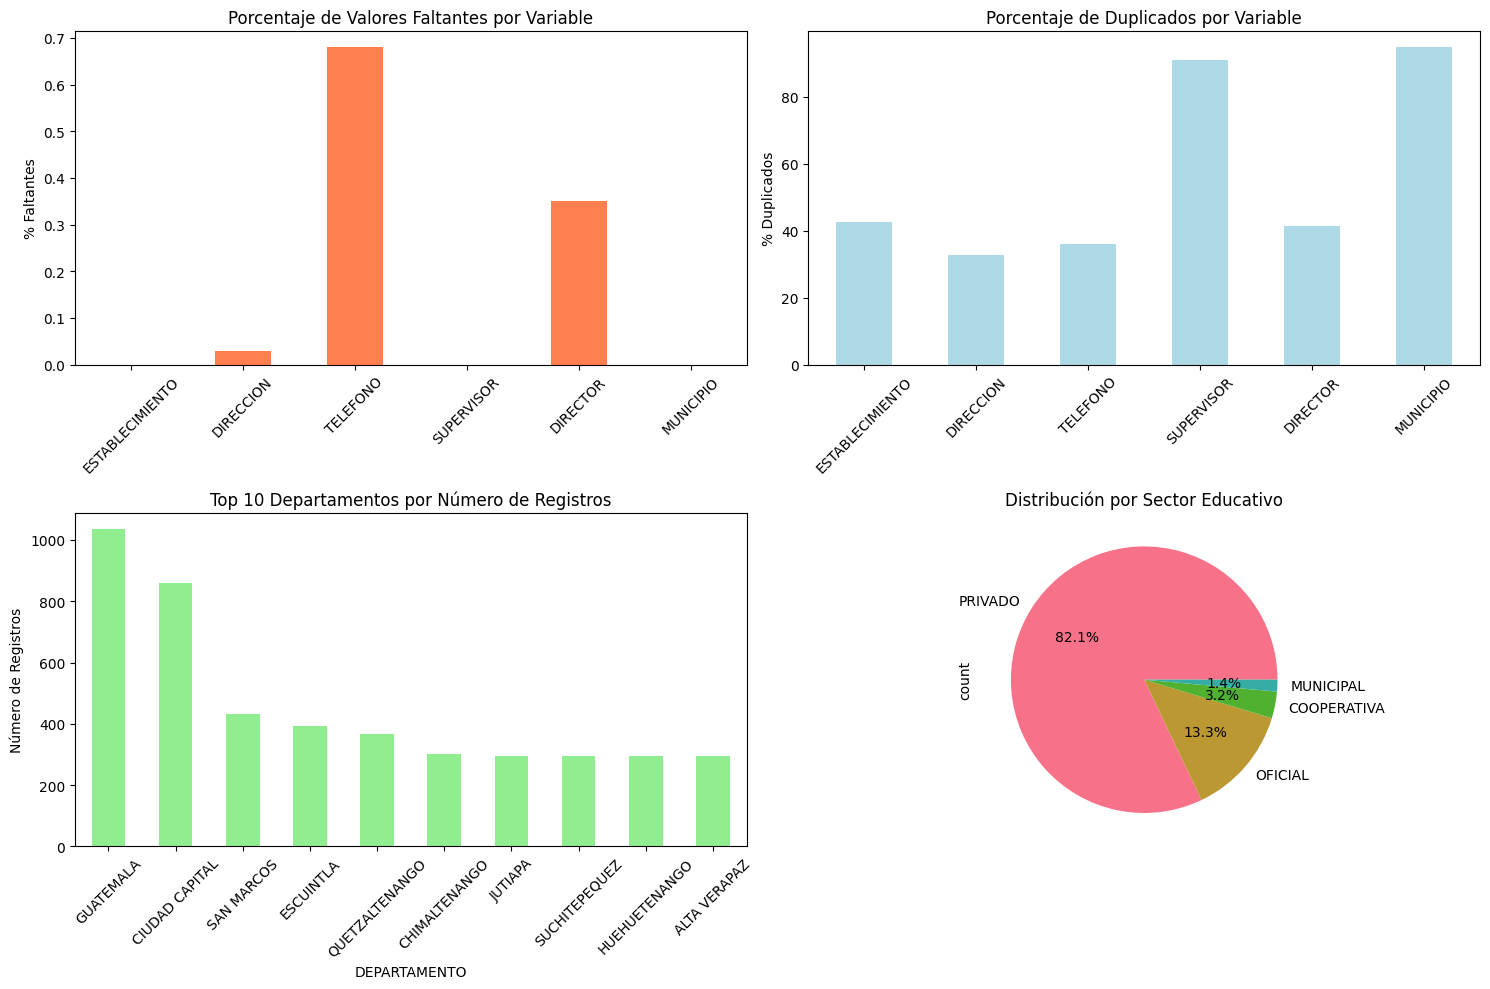

In [5]:
problematic_vars = ['ESTABLECIMIENTO', 'DIRECCION', 'TELEFONO', 'SUPERVISOR', 'DIRECTOR', 'MUNICIPIO']

analysis_results = {}
for var in problematic_vars:
    if var in df_original.columns:
        analysis_results[var] = {
            'total': len(df_original),
            'unique': df_original[var].nunique(),
            'missing': df_original[var].isna().sum(),
            'duplicates': df_original[var].duplicated().sum()
        }

summary_df = pd.DataFrame(analysis_results).T
summary_df['missing_pct'] = (summary_df['missing'] / summary_df['total'] * 100).round(2)
summary_df['duplicate_pct'] = (summary_df['duplicates'] / summary_df['total'] * 100).round(2)

print("\nRESUMEN DE VARIABLES PROBLEMÁTICAS:")
display(summary_df)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

summary_df['missing_pct'].plot(kind='bar', ax=axes[0,0], color='coral')
axes[0,0].set_title('Porcentaje de Valores Faltantes por Variable')
axes[0,0].set_ylabel('% Faltantes')
axes[0,0].tick_params(axis='x', rotation=45)

summary_df['duplicate_pct'].plot(kind='bar', ax=axes[0,1], color='lightblue')
axes[0,1].set_title('Porcentaje de Duplicados por Variable')
axes[0,1].set_ylabel('% Duplicados')
axes[0,1].tick_params(axis='x', rotation=45)

df_original['DEPARTAMENTO'].value_counts().head(10).plot(kind='bar', ax=axes[1,0], color='lightgreen')
axes[1,0].set_title('Top 10 Departamentos por Número de Registros')
axes[1,0].set_ylabel('Número de Registros')
axes[1,0].tick_params(axis='x', rotation=45)

if 'SECTOR' in df_original.columns:
    df_original['SECTOR'].value_counts().plot(kind='pie', ax=axes[1,1], autopct='%1.1f%%')
    axes[1,1].set_title('Distribución por Sector Educativo')

plt.tight_layout()
plt.show()

In [6]:
df_clean = df_original.copy()
cleaning_stats = {
    'registros_originales': len(df_clean),
    'duplicados_removidos': 0,
    'establecimientos_estandarizados': 0,
    'direcciones_corregidas': 0,
    'telefonos_validados': 0,
    'nombres_limpiados': 0
}


columnas_originales = len(df_clean.columns)
df_clean = df_clean.dropna(axis=1, how='all')
columnas_eliminadas = columnas_originales - len(df_clean.columns)
print(f"Columnas vacías eliminadas: {columnas_eliminadas}")

if 'CODIGO' in df_clean.columns:
    registros_antes = len(df_clean)
    df_clean = df_clean.drop_duplicates(subset=['CODIGO'], keep='first')
    duplicados = registros_antes - len(df_clean)
    cleaning_stats['duplicados_removidos'] = duplicados
    print(f"Duplicados eliminados: {duplicados}")

if 'ESTABLECIMIENTO' in df_clean.columns:
    df_clean['ESTABLECIMIENTO_LIMPIO'] = df_clean['ESTABLECIMIENTO'].apply(normalizar_texto)
    
    establishment_mapping, similar_groups = encontrar_similar(df_clean['ESTABLECIMIENTO_LIMPIO'])
    
    if establishment_mapping:
        df_clean['ESTABLECIMIENTO_LIMPIO'] = df_clean['ESTABLECIMIENTO_LIMPIO'].replace(establishment_mapping)
        cleaning_stats['establecimientos_estandarizados'] = len(establishment_mapping)
        
        print(f"   Establecimientos estandarizados: {len(establishment_mapping)}")
        print("   Grupos similares encontrados:")
        for group in similar_groups[:5]: 
            print(f"      • '{group['standard']}' <- {group['count']} variaciones")

if 'DIRECCION' in df_clean.columns:
    df_clean['DIRECCION_LIMPIA'] = df_clean['DIRECCION'].apply(limpiar_dir)
    
    direcciones_corregidas = (df_clean['DIRECCION'] != df_clean['DIRECCION_LIMPIA']).sum()
    cleaning_stats['direcciones_corregidas'] = direcciones_corregidas
    print(f"   Direcciones corregidas: {direcciones_corregidas}")

if 'TELEFONO' in df_clean.columns:
    df_clean['TELEFONO_LIMPIO'] = df_clean['TELEFONO'].apply(limpiar_numero_telefono)
    
    telefonos_validos = df_clean['TELEFONO_LIMPIO'].notna().sum()
    tasa_validacion = (telefonos_validos / len(df_clean)) * 100
    cleaning_stats['telefonos_validados'] = telefonos_validos
    print(f"   Teléfonos válidos: {telefonos_validos:,} ({tasa_validacion:.1f}%)")

for col, col_clean in [('DIRECTOR', 'DIRECTOR_LIMPIO'), ('SUPERVISOR', 'SUPERVISOR_LIMPIO')]:
    if col in df_clean.columns:
        print(f"\nLimpiando {col.lower()}s...")
        df_clean[col_clean] = df_clean[col].apply(limpiar_nombres)
        nombres_limpiados = (df_clean[col] != df_clean[col_clean]).sum()
        cleaning_stats['nombres_limpiados'] += nombres_limpiados
        print(f"   {col}s limpiados: {nombres_limpiados}")

if 'MUNICIPIO' in df_clean.columns:
    df_clean['MUNICIPIO_LIMPIO'] = df_clean['MUNICIPIO'].apply(normalizar_texto)
    
    municipality_fixes = {
        'COBAN': 'COBÁN', 'SALAMA': 'SALAMÁ', 
        'SOLOLA': 'SOLOLÁ', 'TOTONICAPAN': 'TOTONICAPÁN'
    }
    df_clean['MUNICIPIO_LIMPIO'] = df_clean['MUNICIPIO_LIMPIO'].replace(municipality_fixes)
    print(f"  Municipios normalizados")

categorical_columns = ['AREA', 'SECTOR', 'MODALIDAD', 'JORNADA', 'PLAN']
for col in categorical_columns:
    if col in df_clean.columns:
        df_clean[f'{col}_LIMPIO'] = df_clean[col].apply(normalizar_texto)

cleaning_stats['registros_finales'] = len(df_clean)

print(f"Registros finales: {len(df_clean):,}")

Columnas vacías eliminadas: 1
Duplicados eliminados: 0
   Establecimientos estandarizados: 1777
   Grupos similares encontrados:
      • 'COLEGIO PARTICULAR MIXTO IMPERIAL' <- 8 variaciones
      • 'COLEGIO LA INMACULADA' <- 2 variaciones
      • 'ESCUELA NACIONAL DE CIENCIAS COMERCIALES' <- 8 variaciones
      • 'INSTITUTO NACIONAL DE EDUCACION DIVERSIFICADA' <- 52 variaciones
      • 'COLEGIO CRISTIANO BILINGUE VERBO' <- 2 variaciones
   Direcciones corregidas: 1317
   Teléfonos válidos: 6,521 (99.0%)

Limpiando directors...
   DIRECTORs limpiados: 2382

Limpiando supervisors...
   SUPERVISORs limpiados: 1017
  Municipios normalizados
Registros finales: 6,584


ESTADÍSTICAS DE LIMPIEZA:
• Registros Originales: 6,584
• Duplicados Removidos: 0
• Establecimientos Estandarizados: 1,777
• Direcciones Corregidas: 1,317
• Telefonos Validados: 6,521
• Nombres Limpiados: 3,399
• Registros Finales: 6,584
• Tasa de retención: 100.00%


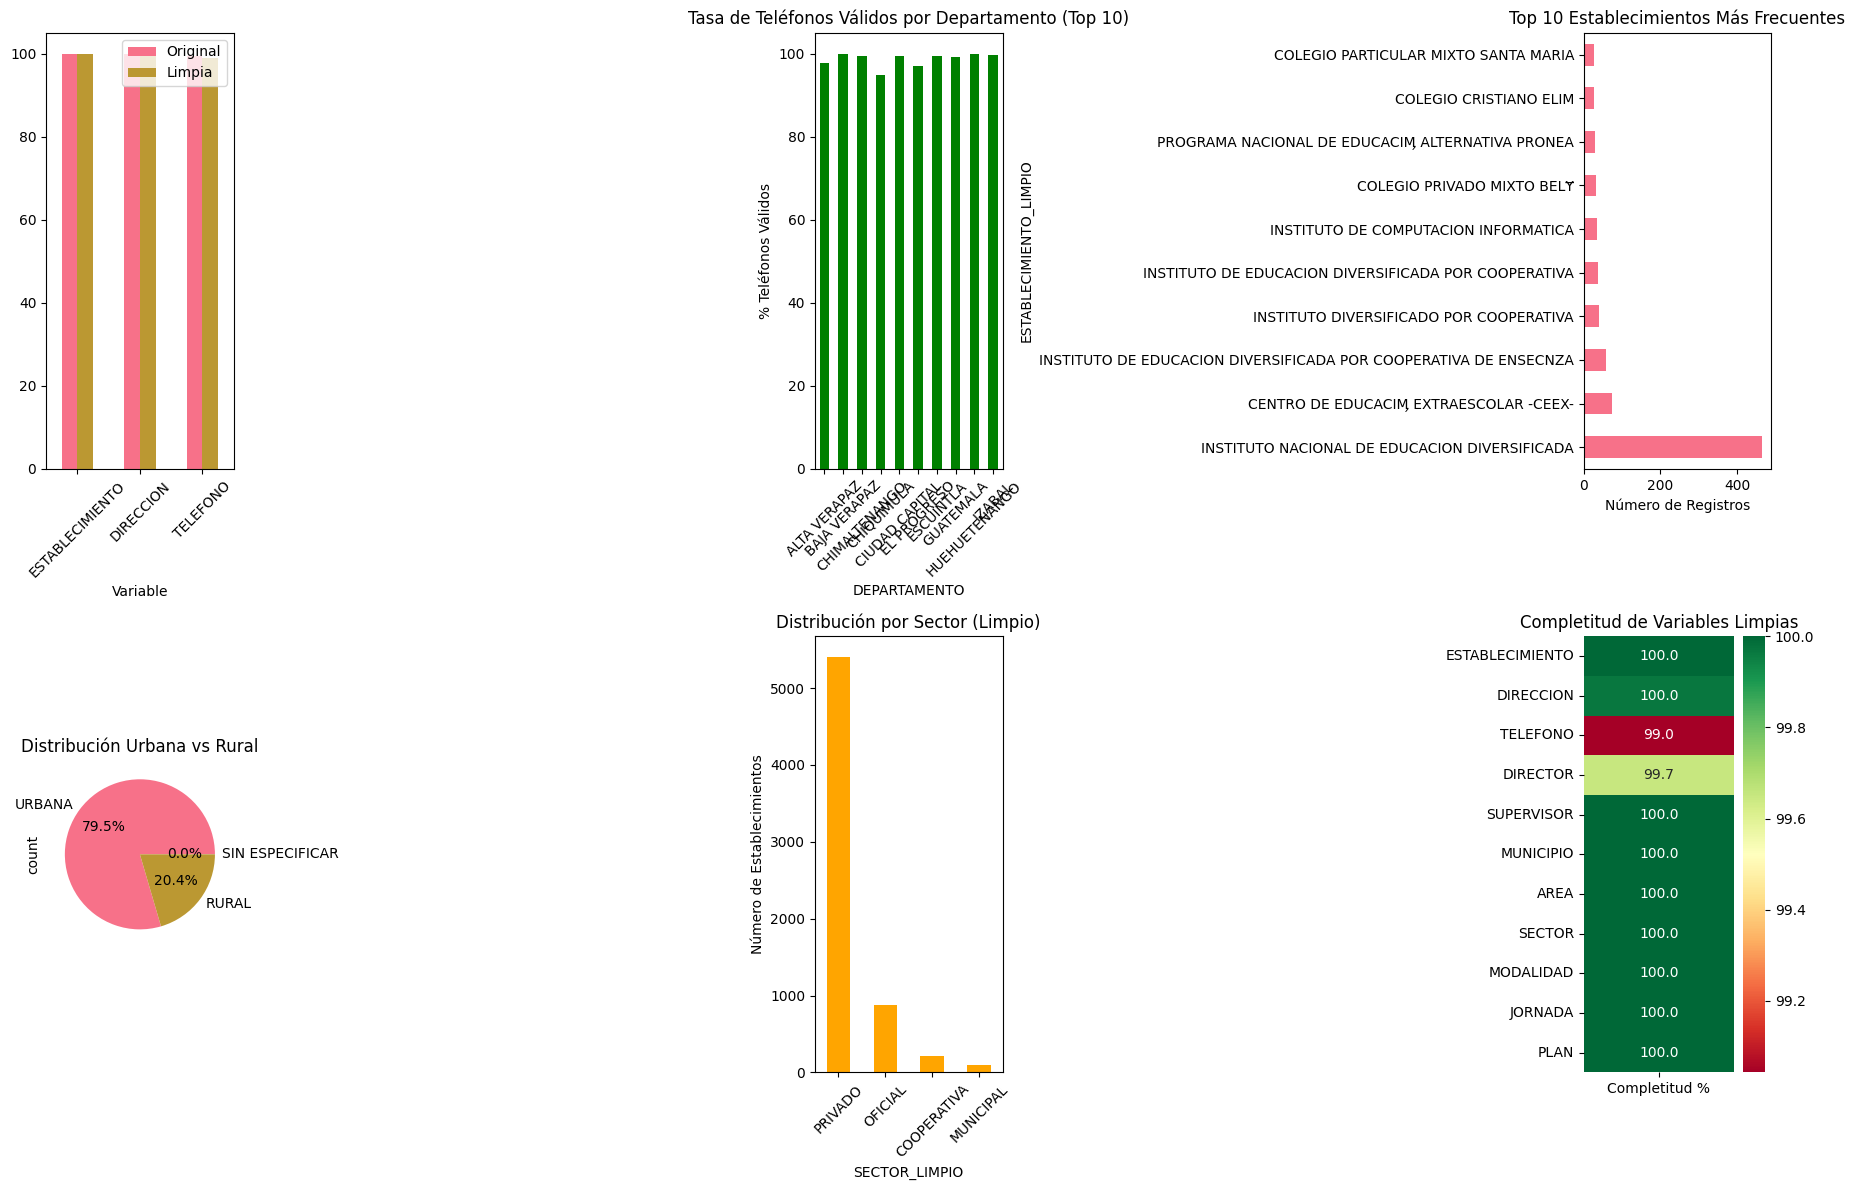

In [7]:
print("ESTADÍSTICAS DE LIMPIEZA:")
for key, value in cleaning_stats.items():
    print(f"• {key.replace('_', ' ').title()}: {value:,}")

tasa_retencion = (cleaning_stats['registros_finales'] / cleaning_stats['registros_originales']) * 100
print(f"• Tasa de retención: {tasa_retencion:.2f}%")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

variables_limpieza = [
    ('ESTABLECIMIENTO', 'ESTABLECIMIENTO_LIMPIO'),
    ('DIRECCION', 'DIRECCION_LIMPIA'), 
    ('TELEFONO', 'TELEFONO_LIMPIO')
]

completeness_comparison = []
for original, cleaned in variables_limpieza:
    if original in df_clean.columns and cleaned in df_clean.columns:
        original_complete = ((df_clean[original].notna()) & (df_clean[original] != "")).sum()
        cleaned_complete = ((df_clean[cleaned].notna()) & (df_clean[cleaned] != "")).sum()
        
        completeness_comparison.append({
            'Variable': original,
            'Original': (original_complete / len(df_clean)) * 100,
            'Limpia': (cleaned_complete / len(df_clean)) * 100
        })

comp_df = pd.DataFrame(completeness_comparison)
if not comp_df.empty:
    comp_df.set_index('Variable')[['Original', 'Limpia']].plot(kind='bar', ax=axes[0,0])
    axes[0,0].tick_params(axis='x', rotation=45)

if 'TELEFONO_LIMPIO' in df_clean.columns:
    phone_by_dept = df_clean.groupby('DEPARTAMENTO').agg({
        'TELEFONO_LIMPIO': lambda x: x.notna().sum(),
        'CODIGO': 'count'
    })
    phone_by_dept['tasa_telefono'] = (phone_by_dept['TELEFONO_LIMPIO'] / phone_by_dept['CODIGO'] * 100)
    
    phone_by_dept['tasa_telefono'].head(10).plot(kind='bar', ax=axes[0,1], color='green')
    axes[0,1].set_title('Tasa de Teléfonos Válidos por Departamento (Top 10)')
    axes[0,1].set_ylabel('% Teléfonos Válidos')
    axes[0,1].tick_params(axis='x', rotation=45)

if 'ESTABLECIMIENTO_LIMPIO' in df_clean.columns:
    top_est = df_clean['ESTABLECIMIENTO_LIMPIO'].value_counts().head(10)
    top_est.plot(kind='barh', ax=axes[0,2])
    axes[0,2].set_title('Top 10 Establecimientos Más Frecuentes')
    axes[0,2].set_xlabel('Número de Registros')

if 'AREA' in df_clean.columns:
    area_dist = df_clean['AREA'].value_counts()
    area_dist.plot(kind='pie', ax=axes[1,0], autopct='%1.1f%%')
    axes[1,0].set_title('Distribución Urbana vs Rural')

if 'SECTOR_LIMPIO' in df_clean.columns:
    sector_dist = df_clean['SECTOR_LIMPIO'].value_counts()
    sector_dist.plot(kind='bar', ax=axes[1,1], color='orange')
    axes[1,1].set_title('Distribución por Sector (Limpio)')
    axes[1,1].set_ylabel('Número de Establecimientos')
    axes[1,1].tick_params(axis='x', rotation=45)

variables_completitud = [col for col in df_clean.columns if col.endswith('_LIMPIO') or col.endswith('_LIMPIA')]
completitud_data = []

for var in variables_completitud:
    completitud = ((df_clean[var].notna()) & (df_clean[var] != "")).sum() / len(df_clean) * 100
    completitud_data.append([var.replace('_LIMPIO', '').replace('_LIMPIA', ''), completitud])

if completitud_data:
    comp_matrix = pd.DataFrame(completitud_data, columns=['Variable', 'Completitud'])
    comp_matrix = comp_matrix.set_index('Variable')['Completitud'].values.reshape(-1, 1)
    
    sns.heatmap(comp_matrix, 
                yticklabels=[item[0] for item in completitud_data],
                xticklabels=['Completitud %'],
                annot=True, fmt='.1f', cmap='RdYlGn',
                ax=axes[1,2])
    axes[1,2].set_title('Completitud de Variables Limpias')

plt.tight_layout()
plt.show()

In [8]:
consolidated_file = output_folder / "guatemala_educacion_limpio.csv"
df_clean.to_csv(consolidated_file, index=False, encoding='utf-8')
print(f"Dataset consolidado guardado: {consolidated_file}")

departamentos_guardados = 0
for dept in df_clean['DEPARTAMENTO'].unique():
    dept_data = df_clean[df_clean['DEPARTAMENTO'] == dept]
    dept_file = output_folder / f"{dept.lower().replace(' ', '_')}_limpio.csv"
    dept_data.to_csv(dept_file, index=False, encoding='utf-8')
    departamentos_guardados += 1

print(f"Archivos por departamento: {departamentos_guardados}")

Dataset consolidado guardado: datasets_limpios\guatemala_educacion_limpio.csv
Archivos por departamento: 23


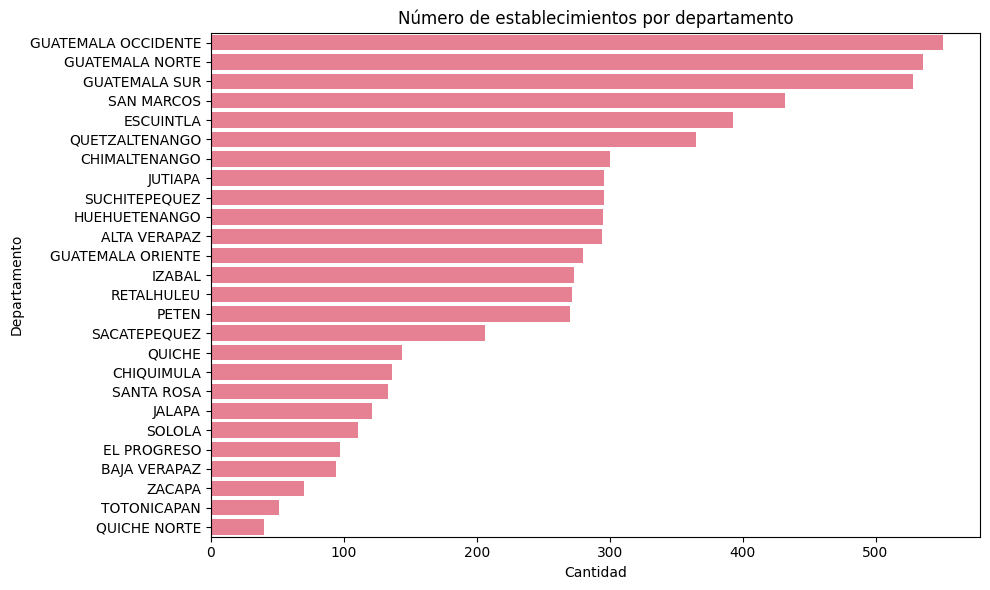

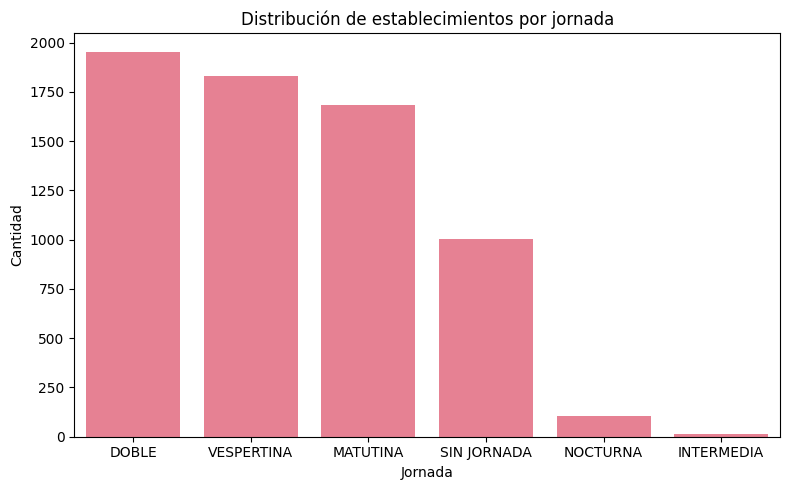

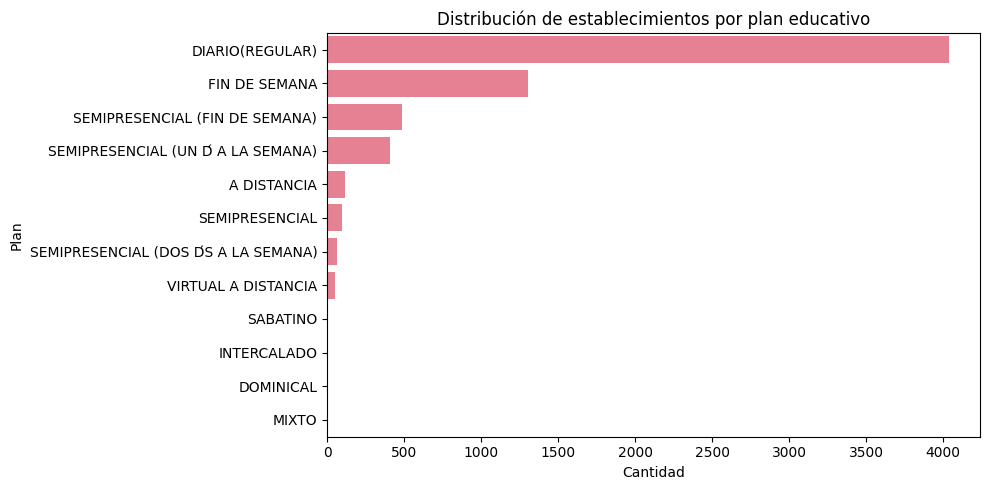

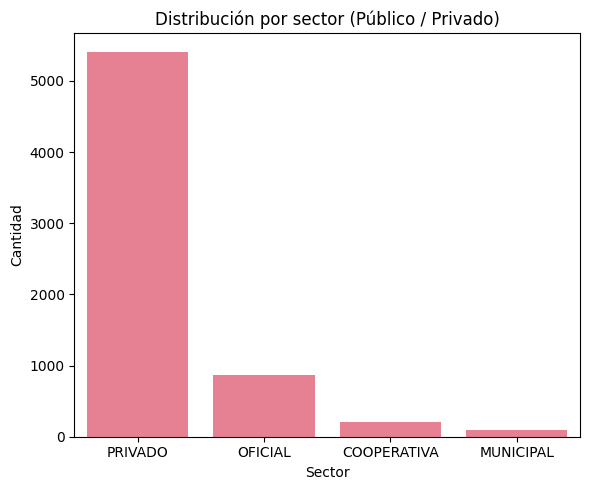

Resultado ANOVA: F_onewayResult(statistic=28.47921704336152, pvalue=2.3022357900919914e-06)


In [9]:
df_completo.describe(include='all').T

df_completo['DEPARTAMENTO'] = df_completo['DEPARTAMENTAL'].str.upper().str.strip()
df_completo['AREA'] = df_completo['AREA'].str.upper().str.strip()
df_completo['JORNADA'] = df_completo['JORNADA'].str.upper().str.strip()
df_completo['PLAN'] = df_completo['PLAN'].str.upper().str.strip()
df_completo['SECTOR'] = df_completo['SECTOR'].str.upper().str.strip()

import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

os.makedirs("statistical_results", exist_ok=True)

plt.figure(figsize=(10, 6))
sns.countplot(data=df_completo, y='DEPARTAMENTO', order=df_completo['DEPARTAMENTO'].value_counts().index)
plt.title("Número de establecimientos por departamento")
plt.xlabel("Cantidad")
plt.ylabel("Departamento")
plt.tight_layout()
plt.savefig("statistical_results/establecimientos_por_departamento.png")
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df_completo, x='JORNADA', order=df_completo['JORNADA'].value_counts().index)
plt.title("Distribución de establecimientos por jornada")
plt.ylabel("Cantidad")
plt.xlabel("Jornada")
plt.tight_layout()
plt.savefig("statistical_results/establecimientos_por_jornada.png")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df_completo, y='PLAN', order=df_completo['PLAN'].value_counts().index)
plt.title("Distribución de establecimientos por plan educativo")
plt.xlabel("Cantidad")
plt.ylabel("Plan")
plt.tight_layout()
plt.savefig("statistical_results/establecimientos_por_plan.png")
plt.show()

plt.figure(figsize=(6, 5))
sns.countplot(data=df_completo, x='SECTOR', order=df_completo['SECTOR'].value_counts().index)
plt.title("Distribución por sector (Público / Privado)")
plt.ylabel("Cantidad")
plt.xlabel("Sector")
plt.tight_layout()
plt.savefig("statistical_results/establecimientos_por_sector.png")
plt.show()

grupo_urbano = df_completo[df_completo["AREA"] == "URBANA"]["DEPARTAMENTO"].value_counts()
grupo_rural = df_completo[df_completo["AREA"] == "RURAL"]["DEPARTAMENTO"].value_counts()

grupo_urbano = grupo_urbano.sort_index()
grupo_rural = grupo_rural.reindex(grupo_urbano.index, fill_value=0)

anova_resultado = f_oneway(grupo_urbano, grupo_rural)
print("Resultado ANOVA:", anova_resultado)


### Análisis de las gráficas
Número de establecimientos por departamento
Los departamentos con más establecimientos son Guatemala Occidente, Guatemala Norte y Guatemala Sur, superando los 500 centros educativos. En contraste, departamentos como Quiché Norte, Totonicapán y Zacapa tienen menos de 100.

Esto evidencia una concentración de la oferta educativa diversificada en el departamento de Guatemala, probablemente debido a su densidad poblacional y mayor urbanización. Las regiones rurales muestran una cobertura educativa considerablemente menor, lo que puede reflejar desigualdad territorial en el acceso a la educación media.

---

### Distribución de establecimientos por jornada
Las jornadas doble, vespertina y matutina son las más comunes. También se observa una cantidad significativa de registros con “sin jornada”, lo que podría indicar datos faltantes o inconsistentes. Las jornadas nocturna e intermedia tienen muy poca representación.

El enfoque predominante en horarios diurnos puede limitar el acceso para estudiantes que trabajan o que requieren horarios más flexibles. Además, los datos faltantes deben ser verificados para mejorar la calidad del análisis.

---

### Distribución de establecimientos por plan educativo
El plan diario (regular) es el más frecuente por un amplio margen. Le siguen los planes de fin de semana y algunos semipresenciales. Planes como virtual, sabatino, dominical e intercalado casi no aparecen.

Esto muestra una baja diversificación en los modelos de enseñanza disponibles. La falta de modalidades flexibles puede restringir la inclusión de estudiantes con necesidades particulares, como adultos que trabajan o personas en áreas remotas.

---

### Distribución por sector
La mayoría de los establecimientos pertenecen al sector privado. El sector oficial (público) tiene una menor participación, mientras que los sectores cooperativa y municipal son mínimos.

Esta distribución sugiere una alta privatización de la educación diversificada. Esto puede representar barreras económicas para los estudiantes que no pueden pagar una educación privada, aumentando la desigualdad si no existen suficientes becas o apoyos estatales.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Cargar todos los datasets limpios y unir
folder = "datasets_limpios"
files = [f for f in os.listdir(folder) if f.endswith(".csv")]
dfs = [pd.read_csv(os.path.join(folder, f)) for f in files]
df_all = pd.concat(dfs)

# Conteo por departamento
print(df_all.columns.tolist())

conteo = df_all['departamento'].value_counts().sort_values(ascending=False)

# Visualización
plt.figure(figsize=(12, 6))
conteo.plot(kind='bar', color='skyblue')
plt.title("Cantidad de Establecimientos por Departamento")
plt.xlabel("Departamento")
plt.ylabel("Cantidad")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("charts/establecimientos_departamento.png")
plt.show()


['CODIGO', 'DISTRITO', 'DEPARTAMENTO', 'MUNICIPIO', 'ESTABLECIMIENTO', 'DIRECCION', 'TELEFONO', 'SUPERVISOR', 'DIRECTOR', 'NIVEL', 'SECTOR', 'AREA', 'STATUS', 'MODALIDAD', 'JORNADA', 'PLAN', 'DEPARTAMENTAL', 'ARCHIVO_ORIGEN', 'ESTABLECIMIENTO_LIMPIO', 'DIRECCION_LIMPIA', 'TELEFONO_LIMPIO', 'DIRECTOR_LIMPIO', 'SUPERVISOR_LIMPIO', 'MUNICIPIO_LIMPIO', 'AREA_LIMPIO', 'SECTOR_LIMPIO', 'MODALIDAD_LIMPIO', 'JORNADA_LIMPIO', 'PLAN_LIMPIO']


KeyError: 'departamento'

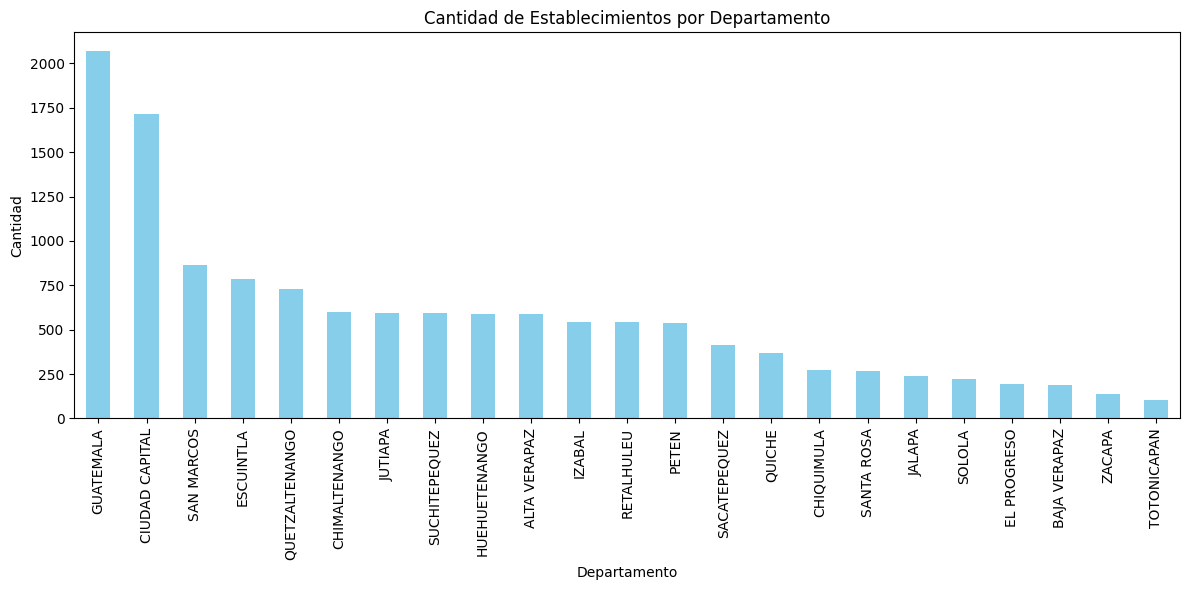

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Ruta a los CSV limpios
folder = "datasets_limpios"
files = [f for f in os.listdir(folder) if f.endswith(".csv")]
dfs = []

# Cargar y normalizar nombres de columnas
for f in files:
    df = pd.read_csv(os.path.join(folder, f))
    df.columns = df.columns.str.strip().str.upper()  # Normalizar a mayúsculas
    dfs.append(df)

# Unir todos los datos
df_all = pd.concat(dfs, ignore_index=True)

# Verificar que DEPARTAMENTO exista y graficar
if "DEPARTAMENTO" in df_all.columns:
    conteo = df_all["DEPARTAMENTO"].value_counts().sort_values(ascending=False)

    # Crear carpeta de salida si no existe
    os.makedirs("charts", exist_ok=True)

    # Graficar
    plt.figure(figsize=(12, 6))
    conteo.plot(kind='bar', color='skyblue')
    plt.title("Cantidad de Establecimientos por Departamento")
    plt.xlabel("Departamento")
    plt.ylabel("Cantidad")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig("charts/establecimientos_departamento.png")
    plt.show()
else:
    print("❌ No se encontró la columna 'DEPARTAMENTO'.")


La gráfica de barras muestra claramente que Guatemala y Ciudad Capital tienen una concentración significativamente mayor de establecimientos educativos en comparación con los demás departamentos. Esto es esperable, ya que concentran la mayor densidad poblacional y la infraestructura educativa más desarrollada del país.

Otros departamentos con alta cantidad de centros educativos son San Marcos, Escuintla y Quetzaltenango, lo cual puede reflejar tanto tamaño poblacional como distribución urbana-rural. Por otro lado, departamentos como Totonicapán, Zacapa, Baja Verapaz y El Progreso tienen una presencia institucional considerablemente menor, lo cual podría evidenciar retos en cobertura educativa o baja densidad poblacional.

Esta gráfica permite:
 - Comparar el acceso a la educación formal entre regiones.
 - Detectar desigualdades territoriales.
 - Sugerir zonas prioritarias para intervención educativa.



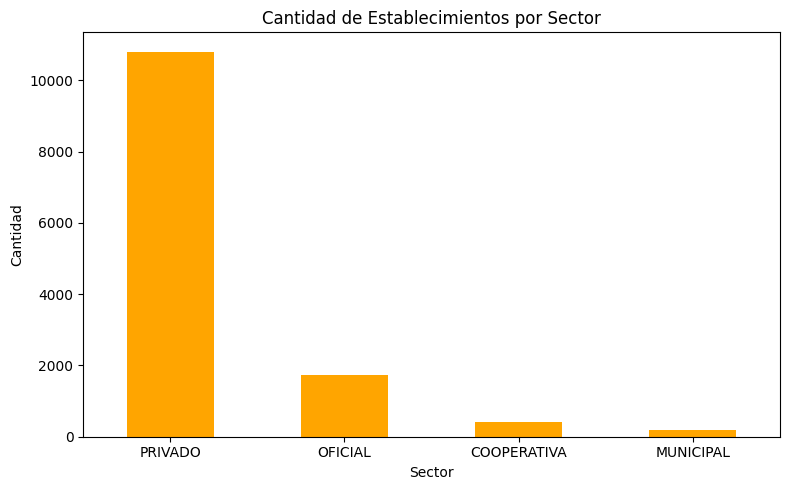

In [18]:
# Gráfico de barras por tipo de sector (público/privado)
if "SECTOR_LIMPIO" in df_all.columns:
    conteo_sector = df_all["SECTOR_LIMPIO"].value_counts()

    plt.figure(figsize=(8, 5))
    conteo_sector.plot(kind='bar', color='orange')
    plt.title("Cantidad de Establecimientos por Sector")
    plt.xlabel("Sector")
    plt.ylabel("Cantidad")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.savefig("charts/establecimientos_sector.png")
    plt.show()
else:
    print("No se encontró la columna 'SECTOR_LIMPIO'")


La gráfica muestra de forma contundente que la mayoría de los establecimientos educativos diversificados en Guatemala pertenecen al sector privado, con más de 10,000 instituciones registradas. Esto representa una proporción abrumadora frente a los demás sectores:

El sector oficial (público) ocupa un segundo lugar distante, con menos de 2,000 centros.

Los sectores cooperativo y municipal tienen una presencia mínima.

Esta concentración sugiere que el acceso a la educación diversificada depende en gran medida de la iniciativa privada.

Puede reflejar desigualdad en la cobertura pública, lo que obliga a muchas familias a recurrir a opciones privadas.

También puede tener implicaciones en el costo de acceso, calidad, supervisión y equidad en la educación.

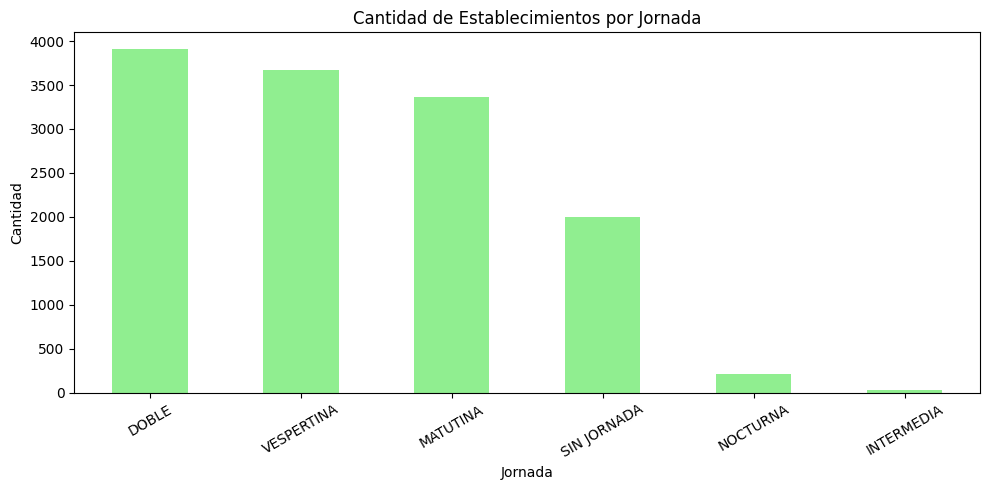

In [20]:
if "JORNADA_LIMPIO" in df_all.columns:
    conteo_jornada = df_all["JORNADA_LIMPIO"].value_counts()

    plt.figure(figsize=(10, 5))
    conteo_jornada.plot(kind='bar', color='lightgreen')
    plt.title("Cantidad de Establecimientos por Jornada")
    plt.xlabel("Jornada")
    plt.ylabel("Cantidad")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.savefig("charts/establecimientos_jornada.png")
    plt.show()
else:
    print("No se encontró la columna 'JORNADA_LIMPIO'")


La gráfica revela que la jornada doble es la más común en los establecimientos educativos diversificados de Guatemala, con cerca de 4,000 registros. Le siguen de cerca las jornadas vespertina y matutina, lo cual indica que muchas instituciones están activas durante uno o dos turnos al día.

puntos importantes:

 - Una cantidad considerable de registros está clasificada como "sin jornada", lo cual podría deberse a errores de captura, datos faltantes o instituciones no convencionales.

 - Las jornadas nocturna e intermedia tienen una representación marginal, lo cual puede reflejar una baja oferta educativa para estudiantes que trabajan o requieren horarios alternativos.

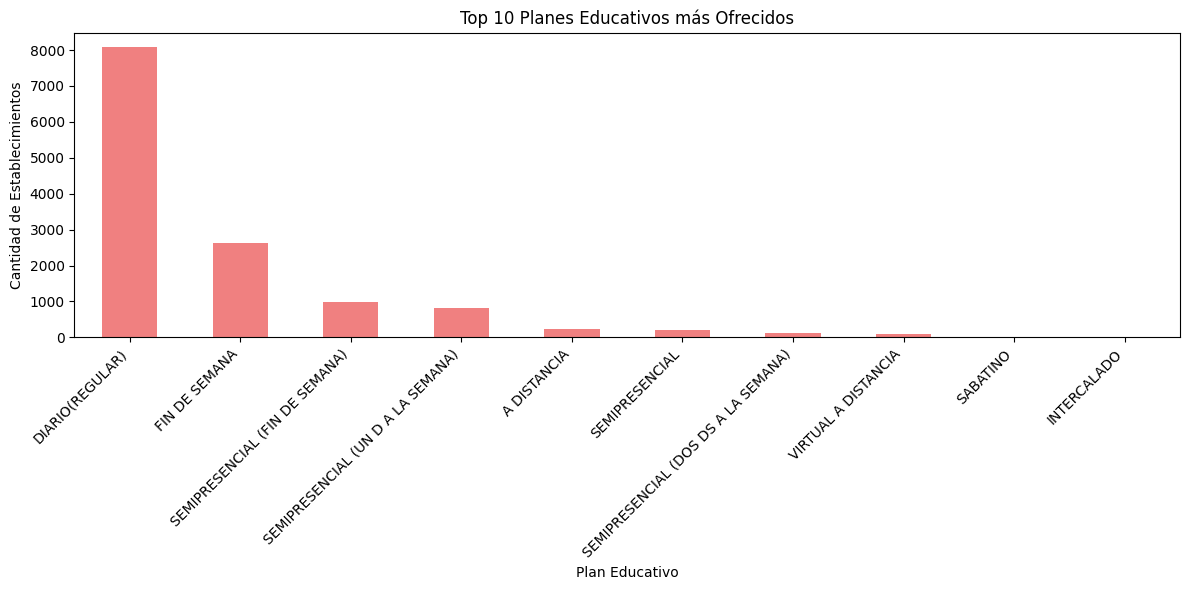

In [22]:
if "PLAN_LIMPIO" in df_all.columns:
    conteo_plan = df_all["PLAN_LIMPIO"].value_counts().head(10)  # los 10 más frecuentes

    plt.figure(figsize=(12, 6))
    conteo_plan.plot(kind='bar', color='lightcoral')
    plt.title("Top 10 Planes Educativos más Ofrecidos")
    plt.xlabel("Plan Educativo")
    plt.ylabel("Cantidad de Establecimientos")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig("charts/establecimientos_plan.png")
    plt.show()
else:
    print(" No se encontró la columna 'PLAN_LIMPIO'")


La gráfica evidencia una concentración abrumadora de instituciones que imparten el plan "DIARIO (REGULAR)", con más de 8,000 centros educativos registrados. Esto indica que la modalidad presencial diaria sigue siendo el estándar dominante en la educación diversificada de Guatemala.



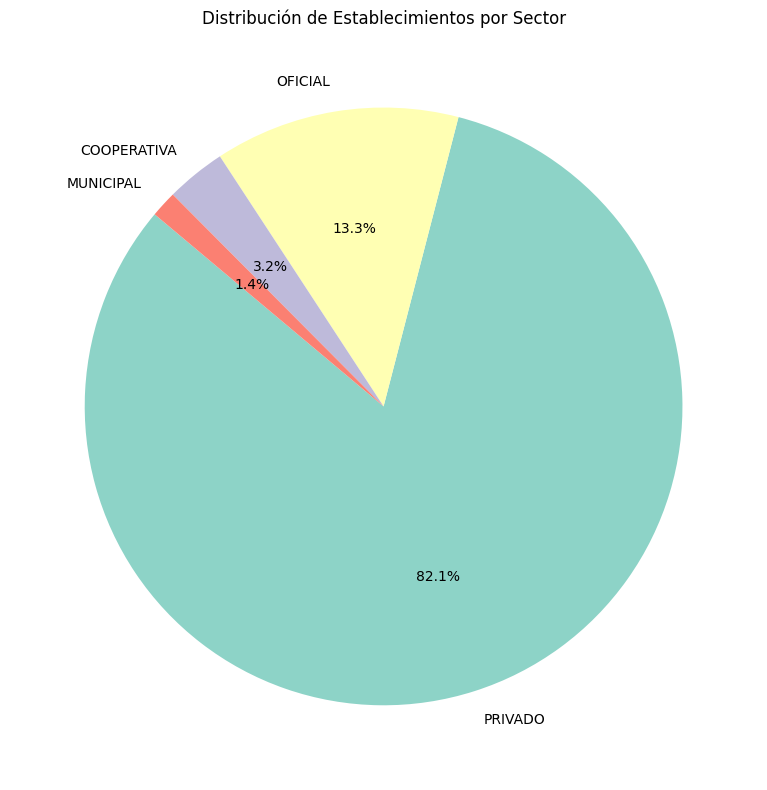

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Ruta de los archivos CSV
folder = "datasets_limpios"
files = [f for f in os.listdir(folder) if f.endswith(".csv")]

# Cargar todos los archivos y unirlos
dfs = []
for f in files:
    df = pd.read_csv(os.path.join(folder, f))
    df.columns = df.columns.str.strip().str.upper()  # Normalizar nombres de columnas
    dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True)

# Contar los valores por sector
sector_counts = df_all["SECTOR_LIMPIO"].value_counts()

# Crear carpeta si no existe
os.makedirs("charts", exist_ok=True)

# Crear la gráfica de pastel
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(
    sector_counts,
    labels=sector_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)
ax.set_title("Distribución de Establecimientos por Sector")
plt.tight_layout()
plt.savefig("charts/pastel_sector.png")
plt.show()


La gráfica de pastel confirma que el sector privado domina con un 82.1% de todos los establecimientos educativos diversificados en Guatemala. Este dato refuerza lo ya observado en gráficas anteriores de barras.

Otros sectores:

Oficial (público): 13.3%

Cooperativa: 3.2%

Municipal: 1.4%

La distribución indica una enorme dependencia del sector privado, lo cual puede tener implicaciones serias en términos de:

Accesibilidad (por costos)

Equidad (brechas entre estudiantes de distintos ingresos)

